### SSH

In [ ]:
# Создаём пару публичный-приватный ключ с шифрованием rsa длинной ключа 2048 бит и комментарием "new key"
ssh-keygen -t rsa -b 2048 -C "new key"
# -t тип шифрования
# -b длина ключа (>= 2**10)
# -C  комментарий (для удобства)

In [ ]:
# Подключаемся к удалённому хосту 40.121.147.122 логинясь под пользователем username, используя в качестве аутентификации 
# приватный ключ id_rsa, и пробрасываем порт "удалённый" порт 5000 в "локальный" порт 1234 для всех доступных с удалённого
# хоста адресов (т.к. указана маска 0.0.0.0)
ssh username@40.121.147.122 -L 1234:0.0.0.0:5000 -I "~/.ssh/id_rsa"

In [ ]:
# запускаем jupyter notebook с отключённой аутентификацией на порту 1234
jupyter notebook --no-browser --port 1234 --ip='*' --NotebookApp.token='' --NotebookApp.password=''

### tmux

Создает виртуальные терминалы

In [ ]:
# Создаём сессию с именем name
tmux new -s name

# Чтобы отключиться от сессии нужно нажать Ctrl+b d. При этом сессия продолжает работать в фоне
# Чтобы завершить сессию можно или нажать Ctrl+b x или Ctrl+d.

In [ ]:
# Посмотреть список работающих сессий
tmux ls

In [ ]:
# Переподключиться к сессии (нет необходимомсти набирать полное имя сессии. Достаточно уникального префикса)
tmux a -t name
# или
tmux attach -t name

In [ ]:
# Убить сессию
tmux kill-session -t name

### Google Colab Connector

1. Необходимо зарегистрироваться на сайте https://dashboard.ngrok.com/signup
2. Скопировать токен https://dashboard.ngrok.com/auth
3. Запустить ячейку ниже и ввести токен из п.2 (возможно придётся запустить ячейку пару раз)
4. Подключиться с помощью полученной команды
5. При необходимости примонтировать Google Drive 

In [ ]:
import random, string, urllib.request, json, getpass

#Generate root password
password = ''.join(random.choice(string.ascii_letters + string.digits) for i in range(20))

#Download ngrok
! wget -q -c -nc https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
! unzip -qq -n ngrok-stable-linux-amd64.zip

#Setup sshd
! apt-get install -qq -o=Dpkg::Use-Pty=0 openssh-server pwgen > /dev/null

#Set root password
! echo root:$password | chpasswd
! mkdir -p /var/run/sshd
! echo "PermitRootLogin yes" >> /etc/ssh/sshd_config
! echo "PasswordAuthentication yes" >> /etc/ssh/sshd_config
! echo "LD_LIBRARY_PATH=/usr/lib64-nvidia" >> /root/.bashrc
! echo "export LD_LIBRARY_PATH" >> /root/.bashrc

#Run sshd
get_ipython().system_raw('/usr/sbin/sshd -D &')

#Ask token
print("Copy authtoken from https://dashboard.ngrok.com/auth")
authtoken = getpass.getpass()

#Create tunnel
get_ipython().system_raw('./ngrok authtoken $authtoken && ./ngrok tcp 22 &')

#Get public address and print connect command
with urllib.request.urlopen('http://localhost:4040/api/tunnels') as response:
    data = json.loads(response.read().decode())
    (host, port) = data['tunnels'][0]['public_url'][6:].split(':')
    print(f'SSH command: ssh -p{port} root@{host}')

#Print root password
print(f'Root password: {password}')

In [ ]:
! mkdir ~/content/gdrive -p

from google.colab import drive

drive.mount('~/content/gdrive')

! ls ~/content/gdrive/

In [ ]:
! sudo apt update && unminimizes

# гит

Гит туториал с коммандами https://git-scm.com/docs/gittutorial

Гайд по настройке ssh для гита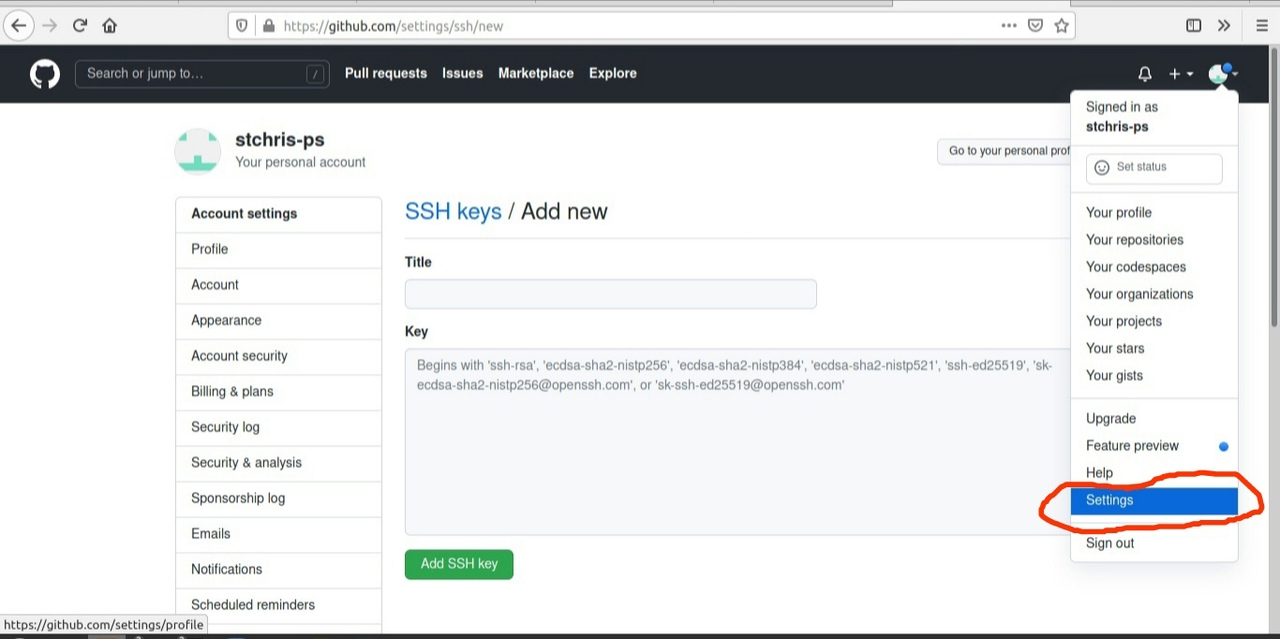

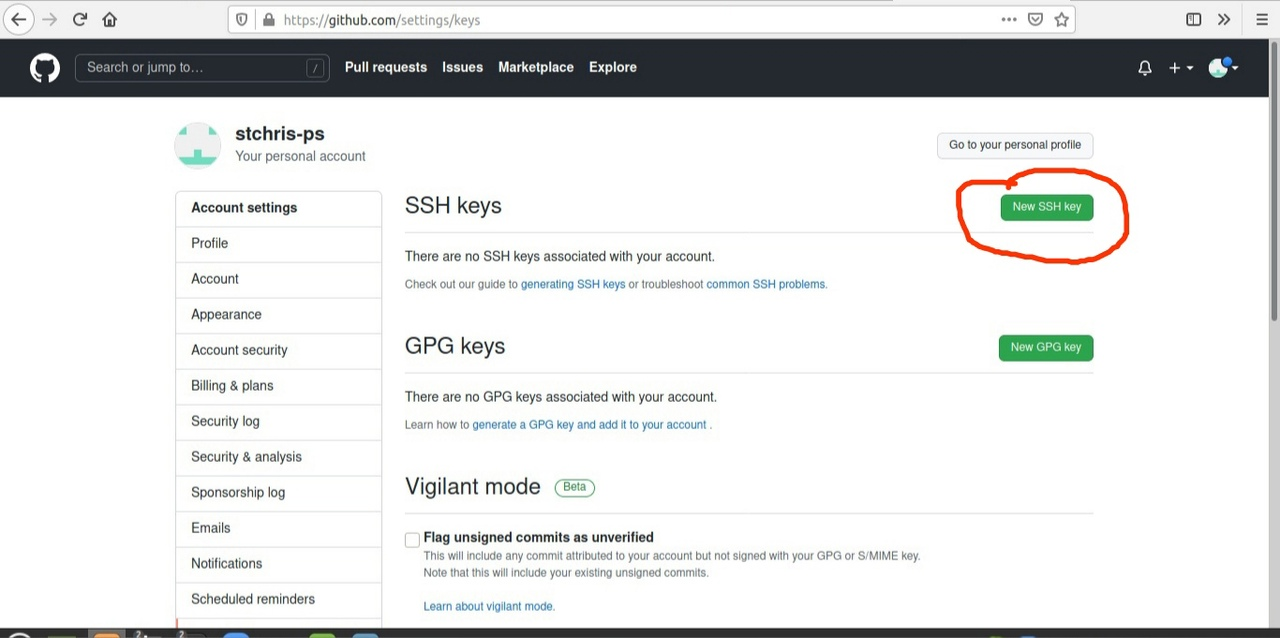

### создаем ssh ключ как было показано на семинаре, копируем публичный ключ сюда

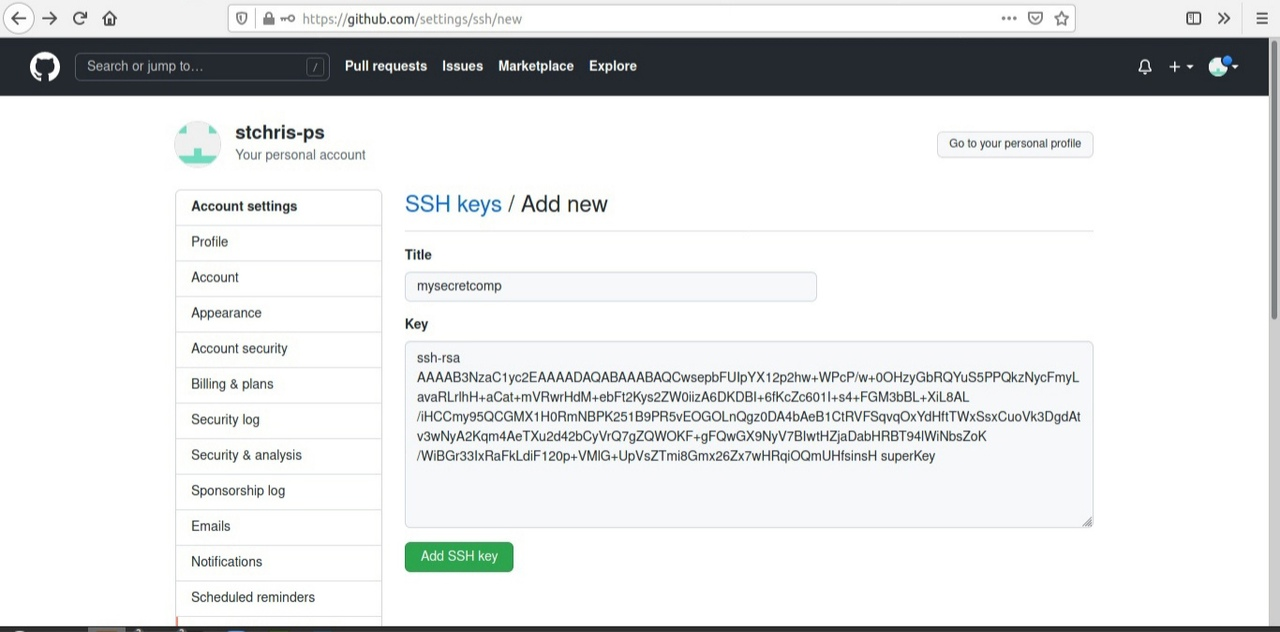

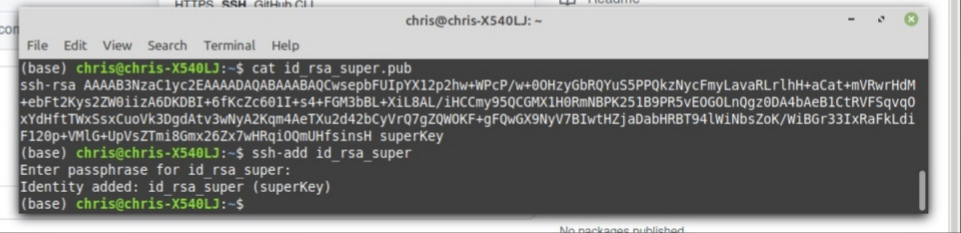

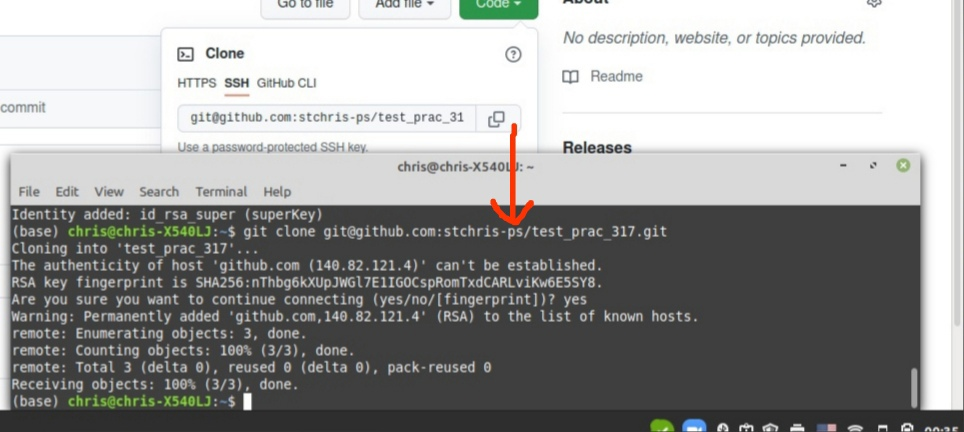